In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

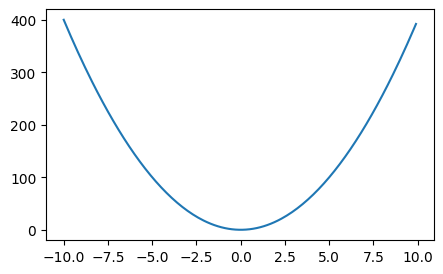

In [110]:
x = np.arange(-10,10, 0.1)
y = 4*(x**2)        # just a random equation 4 also is just a random number 
plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.show()

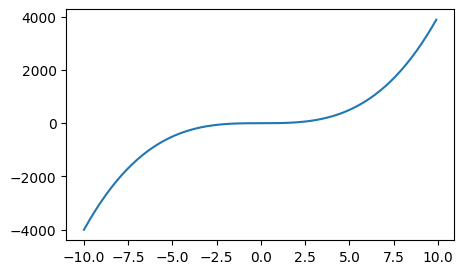

In [111]:
x = np.arange(-10,10, 0.1)
y = 4*(x**3)        # just a random equation 
plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.show()

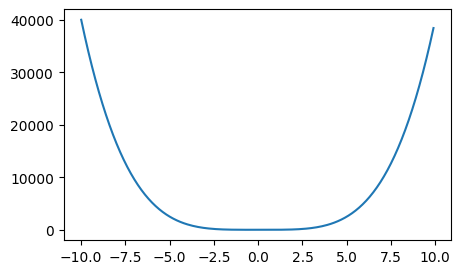

In [112]:
x = np.arange(-10,10, 0.1)
y = 4*(x**4)        # just a random equation 
plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.show()

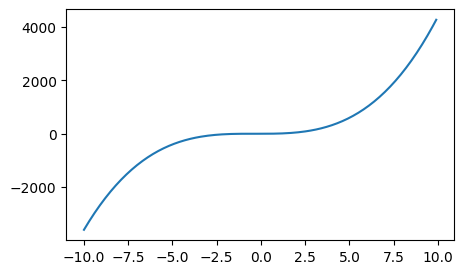

In [113]:
x = np.arange(-10,10, 0.1)
y = 4*(x**2) + 4*(x**3)        # just a random equation 
plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.show()

higher order is dominating the curve


In [114]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [115]:
df[['Level','Salary']].corr()['Salary']

Level     0.817949
Salary    1.000000
Name: Salary, dtype: float64

This is not correct way to check correlation because of not the Level is categorical and salary is numerical But,  

ANNOVA needs minimum 2 values for each group means each level. else it'll give error insufficient data.

we can and SHOULD use ANOVA when the categorical column has multiple records (samples) in each group.

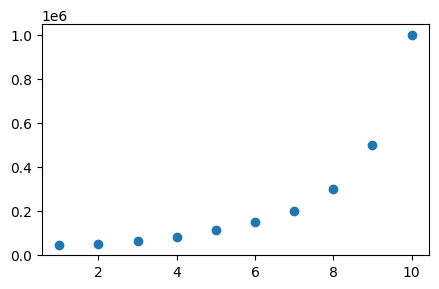

In [116]:
plt.figure(figsize=(5,3))
plt.scatter(df['Level'],df['Salary'])
plt.show()

Here we can not fit a best-fit line, because it'll not fit correctly and accuracy will be less.

In [117]:
# Feature engineering

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [118]:
x = df.iloc[:,[1]]   # OR df[['Level']].values
y = df.iloc[:,[-1]]  # Or df[['Salary']].values
print(x.shape,y.shape)


(10, 1) (10, 1)


In [119]:
poly = PolynomialFeatures(degree=2)
xpoly2 = poly.fit_transform(x)
xpoly2 

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

it contains 3 cols , 1st is constant that can be ignored

2nd is original column

3rd is square of original column

In [120]:
poly3 = PolynomialFeatures(degree=3)
xpoly3 = poly3.fit_transform(x)
xpoly3 

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [121]:
poly4 = PolynomialFeatures(degree=4)
xpoly4 = poly4.fit_transform(x)
xpoly4 

array([[    1.,     1.,     1.,     1.,     1.],
       [    1.,     2.,     4.,     8.,    16.],
       [    1.,     3.,     9.,    27.,    81.],
       [    1.,     4.,    16.,    64.,   256.],
       [    1.,     5.,    25.,   125.,   625.],
       [    1.,     6.,    36.,   216.,  1296.],
       [    1.,     7.,    49.,   343.,  2401.],
       [    1.,     8.,    64.,   512.,  4096.],
       [    1.,     9.,    81.,   729.,  6561.],
       [    1.,    10.,   100.,  1000., 10000.]])

In [122]:
poly4 = PolynomialFeatures(degree=4)
xpoly4 = poly4.fit_transform(x)
np.set_printoptions(suppress=True)  # it will set scientific output to False
xpoly4 

array([[    1.,     1.,     1.,     1.,     1.],
       [    1.,     2.,     4.,     8.,    16.],
       [    1.,     3.,     9.,    27.,    81.],
       [    1.,     4.,    16.,    64.,   256.],
       [    1.,     5.,    25.,   125.,   625.],
       [    1.,     6.,    36.,   216.,  1296.],
       [    1.,     7.,    49.,   343.,  2401.],
       [    1.,     8.,    64.,   512.,  4096.],
       [    1.,     9.,    81.,   729.,  6561.],
       [    1.,    10.,   100.,  1000., 10000.]])

In [123]:
model = LinearRegression()
model.fit(x,y)

yhat = model.predict(x)
r2_score(yhat,y)

0.5053238120653423

In [124]:
model2 = LinearRegression()
model2.fit(xpoly2,y)

yhat2 = model2.predict(xpoly2)
r2_score(yhat2,y)

0.908545049225284

In [125]:
model3 = LinearRegression()
model3.fit(xpoly3,y)

yhat3 = model3.predict(xpoly3)
r2_score(yhat3,y)

0.9808499387901425

In [126]:
model4 = LinearRegression()
model4.fit(xpoly4,y)

yhat4 = model4.predict(xpoly4)
r2_score(yhat4,y)

0.9973854712356893

Cheching it visually

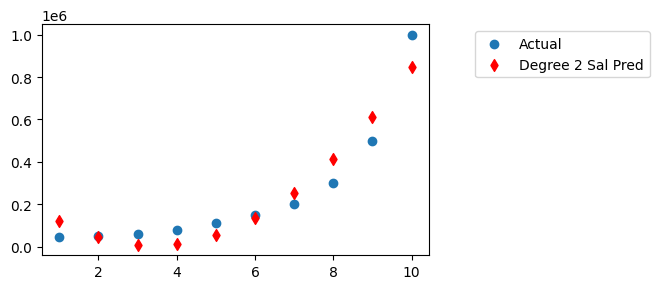

In [127]:
plt.figure(figsize=(5,3))
plt.scatter(df['Level'],df['Salary'], label='Actual')
plt.scatter(df['Level'], yhat2, label = 'Degree 2 Sal Pred', c="r",marker='d')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

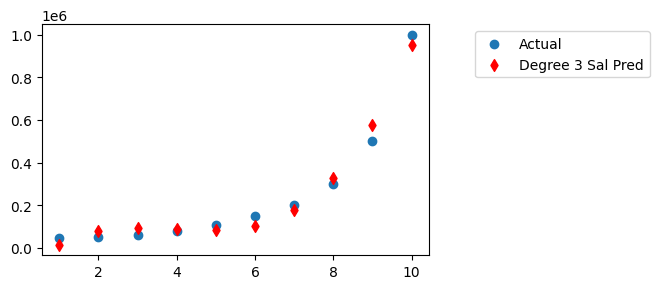

In [128]:
plt.figure(figsize=(5,3))
plt.scatter(df['Level'],df['Salary'], label='Actual')
plt.scatter(df['Level'], yhat3, label = 'Degree 3 Sal Pred', c="r",marker='d')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

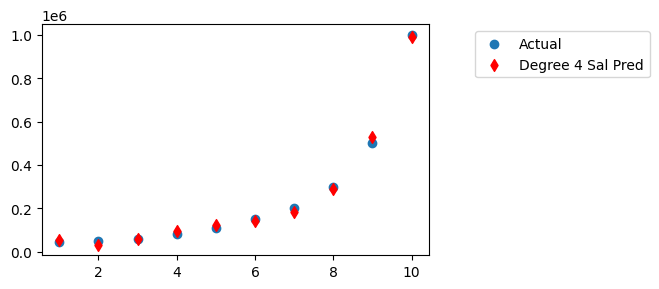

In [129]:
plt.figure(figsize=(5,3))
plt.scatter(df['Level'],df['Salary'], label='Actual')
plt.scatter(df['Level'], yhat4, label = 'Degree 4 Sal Pred', c="r",marker='d')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

In [135]:
# fit means the instructions containing what operation to do
# transform means do the operation
poly5 = PolynomialFeatures(degree=5)
poly5.fit(x)

,degree,5
,interaction_only,False
,include_bias,True
,order,'C'


In [136]:
poly5.fit_transform(x)

array([[     1.,      1.,      1.,      1.,      1.,      1.],
       [     1.,      2.,      4.,      8.,     16.,     32.],
       [     1.,      3.,      9.,     27.,     81.,    243.],
       [     1.,      4.,     16.,     64.,    256.,   1024.],
       [     1.,      5.,     25.,    125.,    625.,   3125.],
       [     1.,      6.,     36.,    216.,   1296.,   7776.],
       [     1.,      7.,     49.,    343.,   2401.,  16807.],
       [     1.,      8.,     64.,    512.,   4096.,  32768.],
       [     1.,      9.,     81.,    729.,   6561.,  59049.],
       [     1.,     10.,    100.,   1000.,  10000., 100000.]])

In [137]:
# for not writing 2 lines of code, we can just use fit_tranform it'll call both the methods

In [152]:
test_val = 6.5

model4.predict(poly4.transform([[test_val]]))

D:\cdac\4 Python\Practice\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[158862.45265155]])